<a href="https://colab.research.google.com/github/therealsunson/SalesDataABCAnalysis/blob/main/ABC_Analysis_of_Active_Inventory_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
data = pd.read_csv('SalesData.csv')

# Take a subset of the data for historical records and relevant columns
data_sub = data[['SKU_number', 'PriceReg', 'ItemCount', 'File_Type']][(data['File_Type'] == 'Historical')]

# Create the column of the additive cost per SKU
data_sub['AddCost'] = data_sub['PriceReg'] * data_sub['ItemCount']

# Order by cumulative cost
data_sub = data_sub.sort_values(by='AddCost', ascending=False)

# Create the column of the running cumulative cost per SKU
data_sub['RunCumCost'] = data_sub['AddCost'].cumsum()

# Create the column of the total sum
data_sub['TotSum'] = data_sub['AddCost'].sum()

# Create the column of the running percentage
data_sub['RunPerc'] = data_sub['RunCumCost'] / data_sub['TotSum']

# Function to assign the class based on the running percentage
def ABC_segmentation(run_perc):
    if run_perc <= 0.8:
        return 'A'
    elif run_perc <= 0.95:
        return 'B'
    else:
        return 'C'

# Create the column of the class using the ABC_segmentation function
data_sub['Class'] = data_sub['RunPerc'].apply(ABC_segmentation)

# Print the ABC segmentation results
print(data_sub[['SKU_number', 'AddCost', 'RunCumCost', 'RunPerc', 'Class']])


       SKU_number   AddCost    RunCumCost   RunPerc Class
685        145889  208154.6  2.081546e+05  0.000608     A
601        435034  173588.8  3.817434e+05  0.001114     A
75056      538479  129619.7  5.113631e+05  0.001492     A
5752       212633  122747.6  6.341107e+05  0.001851     A
3758       212480  120895.2  7.550059e+05  0.002204     A
...           ...       ...           ...       ...   ...
4214       494166       0.0  3.426320e+08  1.000000     C
57965     1758095       0.0  3.426320e+08  1.000000     C
40803      744731       0.0  3.426320e+08  1.000000     C
40847      878815       0.0  3.426320e+08  1.000000     C
16367      874179       0.0  3.426320e+08  1.000000     C

[75996 rows x 5 columns]


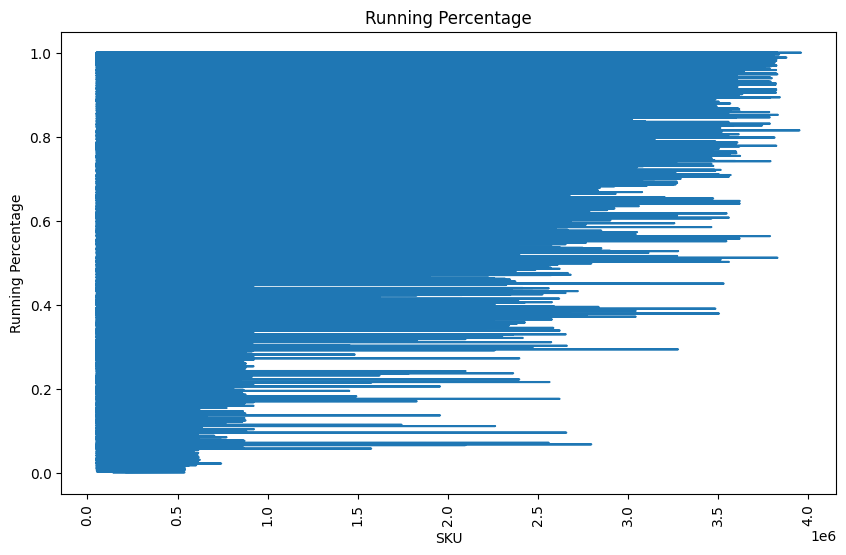

In [6]:
# Create a line plot of running percentage
plt.figure(figsize=(10, 6))
plt.plot(data_sub['SKU_number'], data_sub['RunPerc'])
plt.title('Running Percentage')
plt.xlabel('SKU')
plt.ylabel('Running Percentage')
plt.xticks(rotation=90)
plt.show()

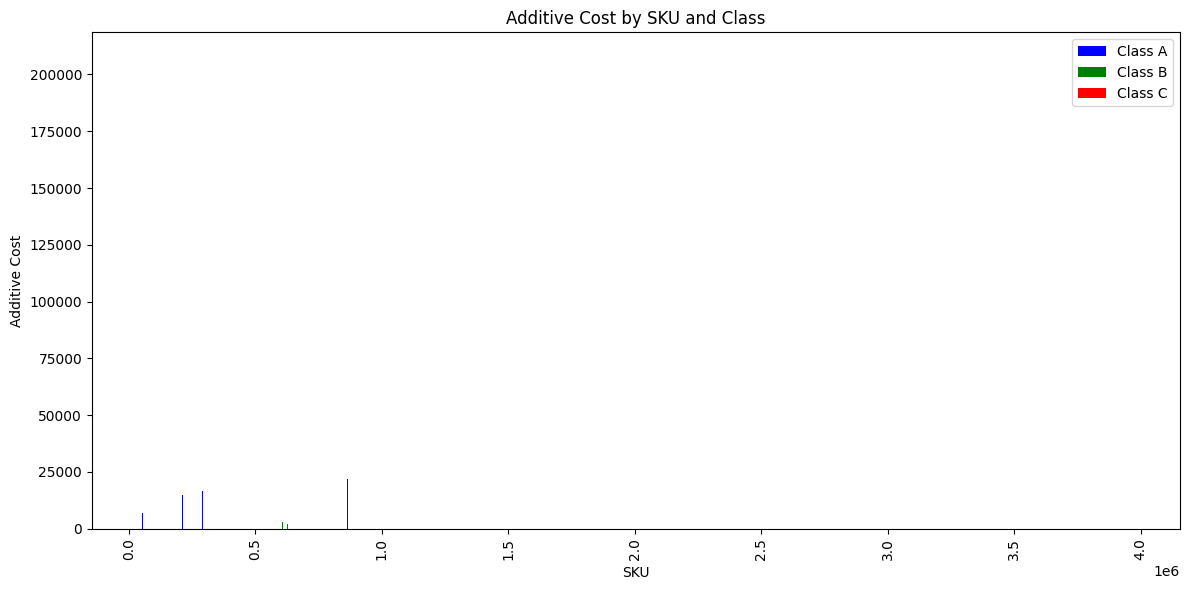

In [7]:
# Create a grouped bar chart of additive cost by SKU and class
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25

# Set the x-axis positions for each class
x_A = data_sub[data_sub['Class'] == 'A']['SKU_number']
x_B = data_sub[data_sub['Class'] == 'B']['SKU_number']
x_C = data_sub[data_sub['Class'] == 'C']['SKU_number']

# Set the y-axis values for additive cost
y_A = data_sub[data_sub['Class'] == 'A']['AddCost']
y_B = data_sub[data_sub['Class'] == 'B']['AddCost']
y_C = data_sub[data_sub['Class'] == 'C']['AddCost']

# Create the grouped bar chart
ax.bar(x_A, y_A, color='b', width=bar_width, label='Class A')
ax.bar(x_B, y_B, color='g', width=bar_width, label='Class B')
ax.bar(x_C, y_C, color='r', width=bar_width, label='Class C')

# Set labels and title
ax.set_xlabel('SKU')
ax.set_ylabel('Additive Cost')
ax.set_title('Additive Cost by SKU and Class')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the chart
plt.tight_layout()
plt.show()

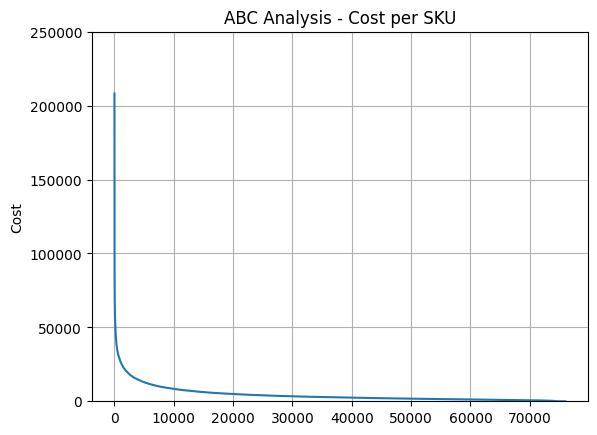

In [11]:
# Get the performance data (cost per SKU)
performance = data_sub['AddCost'].tolist()

# Set the y-axis positions
y_pos = np.arange(len(performance))

# Create the line graph
plt.plot(y_pos, performance)
plt.ylabel('Cost')
plt.title('ABC Analysis - Cost per SKU')
plt.grid(True)
plt.ylim((0, 250000))  # Adjust the y-axis limits as per your data
plt.show()


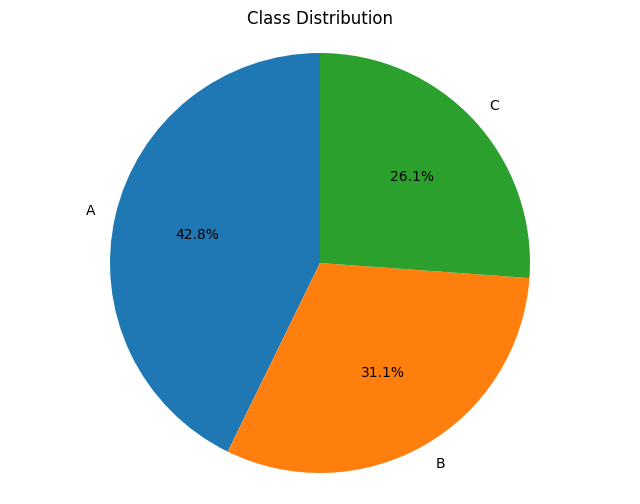

In [ ]:
# Count the number of SKUs in each class
class_counts = data_sub['Class'].value_counts()

# Create a pie chart of class distribution
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.axis('equal')
plt.show()


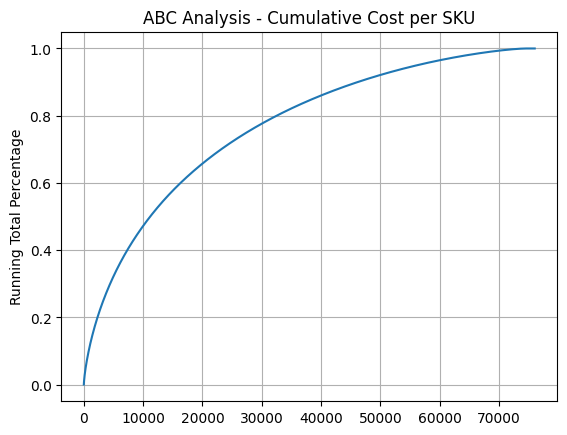

In [12]:
# Get the performance data (cumulative cost per SKU)
performance = data_sub['RunPerc'].tolist()

# Set the y-axis positions
y_pos = np.arange(len(performance))

# Create the line graph
plt.plot(y_pos, performance)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Cost per SKU')
plt.grid(True)
plt.show()